# Вариант 11

In [38]:
from math import sqrt, exp, cos
import math
import numpy as np
import matplotlib.pyplot as plt

Реализовать методы Эйлера, Рунге-Кутты и Адамса 4-го порядка в виде программ, задавая в качестве входных данных шаг сетки. С использованием разработанного программного обеспечения решить задачу Коши для ОДУ 2-го порядка на указанном отрезке. Оценить погрешность численного решения с использованием метода Рунге – Ромберга и путем сравнения с точным решением.

In [39]:
def f(x, y, z):
    return y * math.pow(np.cos(x), 2) - z * np.tan(x)


def g(x, y, z):
    return z


def exact_solution(x):
    return exp(math.sin(x)) + exp(-math.sin(x))


def euler_method(f, g, y0, z0, interval, h):
    l, r = interval
    x = [i for i in np.arange(l, r + h, h)]
    y = [y0]
    z = z0
    for i in range(len(x) - 1):
        z += h * f(x[i], y[i], z)
        y.append(y[i] + h * g(x[i], y[i], z))
    return x, y


def runge_kutta_method(f, g, y0, z0, interval, h, return_z=False):
    l, r = interval
    x = [i for i in np.arange(l, r + h, h)]
    y = [y0]
    z = [z0]
    for i in range(len(x) - 1):
        K1 = h * g(x[i], y[i], z[i])
        L1 = h * f(x[i], y[i], z[i])
        K2 = h * g(x[i] + 0.5 * h, y[i] + 0.5 * K1, z[i] + 0.5 * L1)
        L2 = h * f(x[i] + 0.5 * h, y[i] + 0.5 * K1, z[i] + 0.5 * L1)
        K3 = h * g(x[i] + 0.5 * h, y[i] + 0.5 * K2, z[i] + 0.5 * L2)
        L3 = h * f(x[i] + 0.5 * h, y[i] + 0.5 * K2, z[i] + 0.5 * L2)
        K4 = h * g(x[i] + h, y[i] + K3, z[i] + L3)
        L4 = h * f(x[i] + h, y[i] + K3, z[i] + L3)
        delta_y = (K1 + 2 * K2 + 2 * K3 + K4) / 6
        delta_z = (L1 + 2 * L2 + 2 * L3 + L4) / 6
        y.append(y[i] + delta_y)
        z.append(z[i] + delta_z)

    if not return_z:
        return x, y
    else:
        return x, y, z


def adams_method(f, g, y0, z0, interval, h):
    x_runge, y_runge, z_runge = runge_kutta_method(f, g, y0, z0, interval, h, return_z=True)
    x = x_runge
    y = y_runge[:4]
    z = z_runge[:4]
    for i in range(3, len(x_runge) - 1):
        z_i = z[i] + h * (55 * f(x[i], y[i], z[i]) -
                          59 * f(x[i - 1], y[i - 1], z[i - 1]) +
                          37 * f(x[i - 2], y[i - 2], z[i - 2]) -
                          9 * f(x[i - 3], y[i - 3], z[i - 3])) / 24
        z.append(z_i)
        y_i = y[i] + h * (55 * g(x[i], y[i], z[i]) -
                          59 * g(x[i - 1], y[i - 1], z[i - 1]) +
                          37 * g(x[i - 2], y[i - 2], z[i - 2]) -
                          9 * g(x[i - 3], y[i - 3], z[i - 3])) / 24
        y.append(y_i)
    return x, y


def runge_rombert_method(h1, h2, y1, y2, p):
    assert h1 == h2 * 2
    norm = 0
    for i in range(len(y1)):
        norm += (y1[i] - y2[i * 2]) ** 2
    return norm ** 0.5 / (2**p + 1)


def mae(y1, y2):
    assert len(y1) == len(y2)
    res = 0
    for i in range(len(y1)):
        res += abs(y1[i] - y2[i])
    return res / len(y1)    

Средняя абсолютная ошибка:
шаг = 0.1
Эйлер: 0.05275297045729876
Рунге-Кутта: 1.8138731849859369e-07
Адамс: 6.028075059241996e-05
шаг = 0.05
Эйлер: 0.026144396373139717
Рунге-Кутта: 7.244287582506916e-09
Адамс: 5.038913933663736e-06

Сравнение Рунге–Ромбергом:
Эйлер: 0.03503756141831556
Рунге-Кутта: 3.915717528666607e-08
Адамс: 2.013309056201083e-05


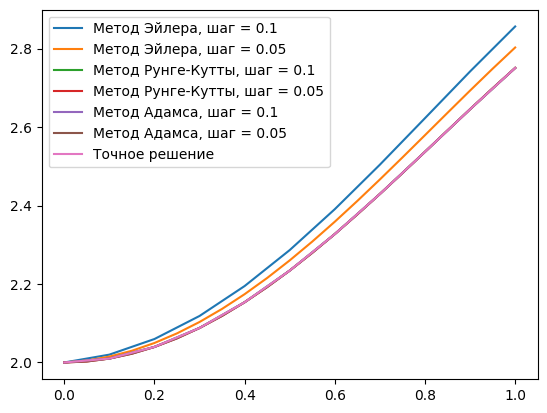

In [40]:
y0 = 2  
dy0 = 0  
interval = (0, 1)  
h = 0.1

x_euler, y_euler = euler_method(f, g, y0, dy0, interval, h)
plt.plot(x_euler, y_euler, label=f'Метод Эйлера, шаг = {h}')
x_euler2, y_euler2 = euler_method(f, g, y0, dy0, interval, h/2)
plt.plot(x_euler2, y_euler2, label=f'Метод Эйлера, шаг = {h/2}')

x_runge, y_runge = runge_kutta_method(f, g, y0, dy0, interval, h)
plt.plot(x_runge, y_runge, label=f'Метод Рунге-Кутты, шаг = {h}')
x_runge2, y_runge2 = runge_kutta_method(f, g, y0, dy0, interval, h/2)
plt.plot(x_runge2, y_runge2, label=f'Метод Рунге-Кутты, шаг = {h/2}')

x_adams, y_adams = adams_method(f, g, y0, dy0, interval, h)
plt.plot(x_adams, y_adams, label=f'Метод Адамса, шаг = {h}')
x_adams2, y_adams2 = adams_method(f, g, y0, dy0, interval, h/2)
plt.plot(x_adams2, y_adams2, label=f'Метод Адамса, шаг = {h/2}')

x_exact = [i for i in np.arange(interval[0], interval[1] + h, h)]
x_exact2 = [i for i in np.arange(interval[0], interval[1] + h/2, h/2)]
y_exact = [exact_solution(x_i) for x_i in x_exact]
y_exact2 = [exact_solution(x_i) for x_i in x_exact2]
plt.plot(x_exact, y_exact, label='Точное решение')

print('Средняя абсолютная ошибка:')
print(f'шаг = {h}')
print('Эйлер:', mae(y_euler, y_exact))
print('Рунге-Кутта:', mae(y_runge, y_exact))
print('Адамс:', mae(y_adams, y_exact))
print(f'шаг = {h/2}')
print('Эйлер:', mae(y_euler2, y_exact2))
print('Рунге-Кутта:', mae(y_runge2, y_exact2))
print('Адамс:', mae(y_adams2, y_exact2))
print()

print('Сравнение Рунге–Ромбергом:')
print('Эйлер:', runge_rombert_method(h, h/2, y_euler, y_euler2, 1))
print('Рунге-Кутта:', runge_rombert_method(h, h/2, y_runge, y_runge2, 4))
print('Адамс:', runge_rombert_method(h, h/2, y_adams, y_adams2, 4))

plt.legend()
plt.show()

Реализовать метод стрельбы и конечно-разностный метод решения краевой задачи для ОДУ в виде программ. С использованием разработанного программного обеспечения решить краевую задачу для обыкновенного дифференциального уравнения 2-го порядка на указанном отрезке. Оценить погрешность численного решения с использованием метода Рунге – Ромберга и путем сравнения с точным решением. 

In [41]:
def tridiagonal_solve(A, b):
    n = len(A)
    v = [0 for _ in range(n)]
    u = [0 for _ in range(n)]
    v[0] = A[0][1] / -A[0][0]
    u[0] = b[0] / A[0][0]
    for i in range(1, n-1):
        v[i] = A[i][i+1] / (-A[i][i] - A[i][i-1] * v[i-1])
        u[i] = (A[i][i-1] * u[i-1] - b[i]) / (-A[i][i] - A[i][i-1] * v[i-1])
    v[n-1] = 0
    u[n-1] = (A[n-1][n-2] * u[n-2] - b[n-1]) / (-A[n-1][n-1] - A[n-1][n-2] * v[n-2])
    x = [0 for _ in range(n)]
    x[n-1] = u[n-1]
    for i in range(n-1, 0, -1):
        x[i-1] = v[i-1] * x[i] + u[i-1]
    return x


def f(x, y, z):
    return (2 * z + exp(x) * y) / (exp(x) + 1)


def g(x, y, z):
    return z

def p_fd(x):
    return -2 / (exp(x) + 1)


def q_fd(x):
    return -exp(x) / (exp(x) + 1)


def f_fd(x):
    return 0


def exact_solution(x):
    return exp(x) - 1 + 1 / (exp(x) + 1)


def shooting_method(f, g, y0, yn, interval, h, eps):
    n_prev = 1.0
    n = 0.8
    iterations = 0
    while True:
        iterations += 1
        x_prev, y_prev = runge_kutta_method(f, g, y0, n_prev, interval, h)
        x, y = runge_kutta_method(f, g, y0, n, interval, h)
        if abs(y[-1] - yn) < eps:
            break
        n_prev, n = n, n - (y[-1] - yn) * (n - n_prev) / ((y[-1] - yn) - (y_prev[-1] - yn))
    return x, y, iterations


def finite_difference_method(p, q, f, y0, yn, interval, h):
    A = []
    B = []
    rows = []
    a, b = interval
    x = np.arange(a, b + h, h)
    n = len(x)

    for i in range(n):
        if i == 0:
            rows.append(1)
        else:
            rows.append(0)
    A.append(rows)
    B.append(y0)

    for i in range(1, n - 1):
        rows = []
        B.append(f(x[i]))
        for j in range(n):
            if j == i - 1:
                rows.append(1 / h ** 2 - p(x[i]) / (2 * h))
            elif j == i:
                rows.append(-2 / h ** 2 + q(x[i]))
            elif j == i + 1:
                rows.append(1 / h ** 2 + p(x[i]) / (2 * h))
            else:
                rows.append(0)
        A.append(rows)

    rows = []
    B.append(yn)
    for i in range(n):
        if i == n - 1:
            rows.append(1)
        else:
            rows.append(0)

    A.append(rows)
    y = tridiagonal_solve(A, B)
    return x, y


def runge_romberg_method(h1, h2, y1, y2, p):
    assert h1 == h2 * 2
    norm = 0
    for i in range(len(y1)):
        norm += (y1[i] - y2[i * 2]) ** 2
    return norm ** 0.5 / (2 ** p + 1)


def mae(y1, y2):
    assert len(y1) == len(y2)
    res = 0
    for i in range(len(y1)):
        res += abs(y1[i] - y2[i])
    return res / len(y1)


Итерации:
шаг = 0.1
Метод стрельбы: 2
шаг = 0.05
Метод стрельбы: 2

Средняя абсолютная ошибка
шаг = 0.1
Метод стрельбы: 9.494474130121822e-05
Конечно-разностный метод: 0.00015496749798701607
шаг = 0.05
Метод стрельбы:  9.422480418318026e-05
Конечно-разностный метод: 0.00010998854411740988

Сравнение Рунге–Ромбергом:
Метод стрельбы:  2.547224856404316e-07
Конечно-разностный метод:  1.0191399734451214e-05


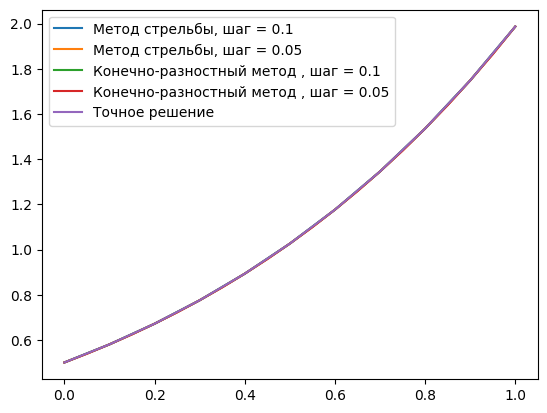

In [42]:
y0 = 0.5
y1 = 1.987
interval = (0, 1)  # x in [0; 1]
h = 0.1
eps = 0.001

x_shooting, y_shooting, iters_shooting = shooting_method(f, g, y0, y1, interval, h, eps)
plt.plot(x_shooting, y_shooting, label=f'Метод стрельбы, шаг = {h}')
x_shooting2, y_shooting2, iters_shooting2 = shooting_method(f, g, y0, y1, interval, h / 2, eps)
plt.plot(x_shooting2, y_shooting2, label=f'Метод стрельбы, шаг = {h / 2}')

x_fd, y_fd = finite_difference_method(p_fd, q_fd, f_fd, y0, y1, interval, h)
plt.plot(x_fd, y_fd, label=f'Конечно-разностный метод , шаг = {h}')
x_fd2, y_fd2 = finite_difference_method(p_fd, q_fd, f_fd, y0, y1, interval, h / 2)
plt.plot(x_fd2, y_fd2, label=f'Конечно-разностный метод , шаг = {h / 2}')

x_exact = [i for i in np.arange(interval[0], interval[1] + h, h)]
x_exact2 = [i for i in np.arange(interval[0], interval[1] + h / 2, h / 2)]
y_exact = [exact_solution(x_i) for x_i in x_exact]
y_exact2 = [exact_solution(x_i) for x_i in x_exact2]
plt.plot(x_exact, y_exact, label='Точное решение')

print('Итерации:')
print(f'шаг = {h}')
print('Метод стрельбы:', iters_shooting)
print(f'шаг = {h / 2}')
print('Метод стрельбы:', iters_shooting2)
print()

print('Средняя абсолютная ошибка')
print(f'шаг = {h}')
print('Метод стрельбы:', mae(y_shooting, y_exact))
print('Конечно-разностный метод:', mae(y_fd, y_exact))
print(f'шаг = {h / 2}')
print('Метод стрельбы: ', mae(y_shooting2, y_exact2))
print('Конечно-разностный метод:', mae(y_fd2, y_exact2))
print()

print('Сравнение Рунге–Ромбергом:')
print('Метод стрельбы: ', runge_romberg_method(h, h / 2, y_shooting, y_shooting2, 1))
print('Конечно-разностный метод: ', runge_romberg_method(h, h / 2, y_fd, y_fd2, 4))

plt.legend()
plt.show()